In [262]:
import numpy as np
import pandas as pd
import cv2
from numpy import linalg as LA
from sklearn.preprocessing import scale
import math
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image
import pylab

# (a)

In [263]:
array = []
image_folders = glob.glob("faces_4/*")
for itr in image_folders:
    imgf = glob.glob(itr+"/*.pgm")
    for f in imgf:
        img = cv2.imread(f,0)
        img = img.flatten()
        array.append(img.tolist())  
array = np.array(array)

In [264]:
print (array.T)

[[ 15  15  14 ...,  29  36  29]
 [ 37  36  33 ...,  53  65  54]
 [ 35  34  31 ...,  44  56  46]
 ..., 
 [  0 126 119 ...,   8  25   5]
 [  0  49  62 ...,   3   3   4]
 [  0   0   0 ...,   0   0   3]]


# (b)

In [265]:
arr = array
if len(arr) == 0:
    arr = np.array([])
X = np.empty((0,arr[0].size),dtype=arr[0].dtype)

In [266]:
for i in arr:
    X = np.vstack((X,np.asarray(i).reshape(1,-1)))
arr = X

In [267]:
def cal(ev,n):
    for i in range(n):
        ev[:,i] = ev[:,i]/np.linalg.norm(ev[:,i])
    return ev

In [268]:
[n,d] = arr.shape
arr = arr - arr.mean(axis=0)
if n > d:
    C = np.dot(arr.T,arr)
else :
    C = np.dot(arr,arr.T)

In [269]:
[e_values,e_vectors] = np.linalg.eigh(C)
[U,s,V] = np.linalg.svd(C)
e_vectors = np.dot(X.T,e_vectors)
e_vectors = cal(e_vectors,n)

In [270]:
idx = np.argsort(-e_values)
e_values = e_values[idx]
e_vectors = e_vectors[:,idx]
idx2 = np.argsort(-s)
s = s[idx2]
e_values = e_values[0:n].copy()
e_vectors = e_vectors[:,0:n].copy()

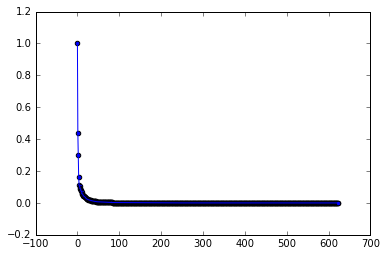

In [271]:
s = s/s[0]
k = range(0, len(s))
plt.scatter(k, s)
plt.plot(k, s)
plt.show()

In [272]:
ve = [(i/sum(e_values))*100 for i in sorted(e_values,reverse=True)]
cve = np.cumsum(ve)

In [273]:
x1 = 1
x2 = 1
x3 = 1
for i in range(0,len(cve)):
    if cve[i] < 90:
        x1 = x1 + 1    # 90 % 
    if cve[i] < 80:
        x2 = x2 + 1    # 80 %
    if cve[i] < 50:
        x3 = x3 + 1   # 50 %

In [274]:
print (x1) # Number of Principal components for 90 %

41


In [275]:
print (x2) # Number of Principal components for 80 %

21


In [276]:
print (x3) # Number of Principal components for 50 %

4


#  (c)

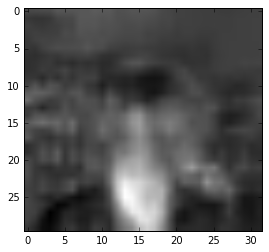

In [277]:
images = []
for i in range(0,4):
    e = e_vectors[:,i].reshape(array[0].shape)
    e = np.asarray(e)
    e = e - float(np.min(e))
    e = e / float((np.max(e)-np.min(e)))
    e = e * (255)
    e = np.asarray(e)
    images.append(e)

for i in range(0,4):
    plt.imshow(np.asarray(images[i].reshape(30,32)))
    

# (d)

In [278]:
indx = [1, 2, 10, 100]
E = []
for i in indx:
    P = np.dot(X[0].reshape(1,-1),W[:,0:i])
    R = np.dot(P,W[:,0:i].T)
    R = R.reshape(X[0].shape)
    e = R
    e = np.asarray(e)
    e = e - float(np.min(e))
    e = e / float((np.max(e)-np.min(e)))
    e = e * (255)
    e = np.asarray(e)
    E.append(e)

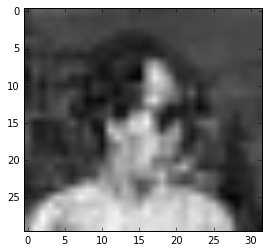

In [251]:
for i in range(0,4):
    plt.imshow(np.asarray(E[i].reshape(30,32)))